For using the library, it's important clone and install the project, because the repoository is local

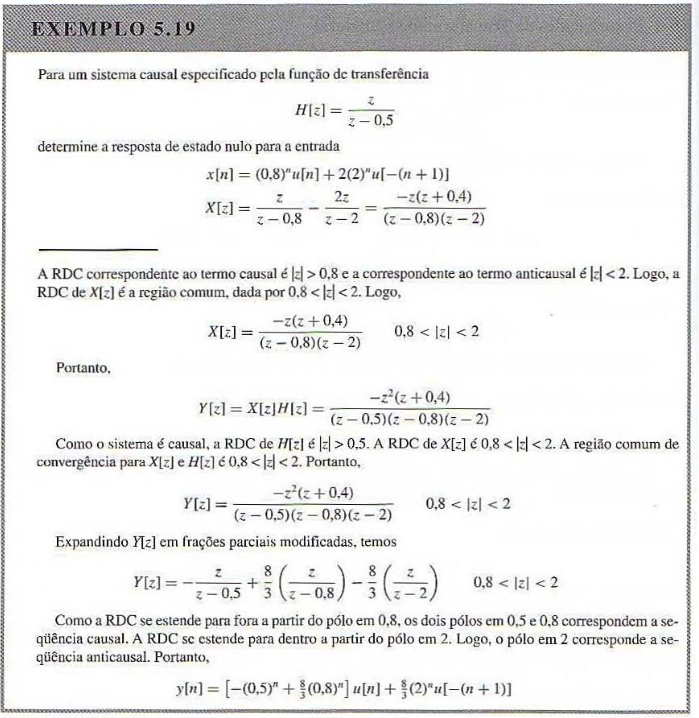

In [1]:
!git clone https://github.com/pedronobredmc/z-transform-lib.git
!pip install -e /content/z-transform-lib/code/

Cloning into 'z-transform-lib'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 148 (delta 33), reused 76 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (148/148), 599.05 KiB | 5.93 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Obtaining file:///content/z-transform-lib/code
  Preparing metadata (setup.py) ... done
  Running setup.py develop for ztransform


Now, for import the library files, the sys path must be updated

In [2]:
import sys
sys.path.append('/content/z-transform-lib/code')  # Add the directory containing ztransform to the path
from lib.ztransform import ZT, ztransform # Import from the correct location using absolute path
from lib.inverse_ztransform import inverse_ztransform

Sample of library usage

In [3]:
import sympy as sp

from sympy import solve

import sys
sys.path.append('/content/z-transform-lib/code')  # Add the directory containing ztransform to the path
from lib.ztransform import ZT, ztransform # Import from the correct location using absolute path
from lib.inverse_ztransform import inverse_ztransform


# Definição da variável n
n = sp.symbols('n',Interge=True)

# Função de transferência H(z)
z = sp.symbols('z')
H_z = z / (z - 0.5)



# Definição do termo anticausal original
x_anticausal = 2 * (2**n) * sp.Heaviside(-(n+1))

# Reflexão do sinal para torná-lo causal
x_reflect = x_anticausal.subs(n, -n)

# Cálculo da Transformada Z da versão refletida
X_reflect_z = ztransform(x_reflect, n, z)

# Aplicação da substituição z -> 1/z para obter a Transformada Z correta
X_anticausal_z = sp.simplify(X_reflect_z.subs(z, 1/z))


# Definição da sequência x[n]
x_n_causal = (0.8**n) * sp.Heaviside(n)

# Cálculo da Transformada Z de x[n]
X_z_causal = ztransform(x_n_causal, n, z)

X_z= sp.simplify(X_z_causal + X_anticausal_z)

# Cálculo de Y(z)
Y_z = sp.simplify(X_z * H_z)

# Expansão em frações parciais
Y_z_partial = sp.apart(Y_z, z)

# Encontrar os polos de Y(z)
polos = solve(sp.denom(Y_z), z)
print("Polos de Y(z):", polos)

# Transformada Z inversa para obter y[n]
y_n = inverse_ztransform(Y_z_partial, z, n)

# Separando a expressão (pegando apenas a parte dentro do Piecewise)
expr_separada = y_n.args[0][0]  # args[0][0] acessa a parte simbólica da Piecewise

# Extraindo os três termos
termos = expr_separada.as_ordered_terms()

# Atribuindo cada termo a uma variável
termo1, termo2, termo3 = termos

# Exibir os resultados
print("X(z) =", X_z)
print("H(z) =", H_z)
print("Y(z) =", Y_z)
print("Y(z) em frações parciais =",Y_z_partial)
print("y(n) inversa =",y_n)

exp_final=termo1*sp.Heaviside(n) +termo2*sp.Heaviside(n) +termo3*sp.Heaviside(-(n+1))
print("resultado final adicionando o termo não causal =",exp_final)


Polos de Y(z): [0.500000000000000, 0.800000000000000, 2.00000000000000]
X(z) = z*(-z - 0.4)/((z - 2)*(z - 0.8))
H(z) = z/(z - 0.5)
Y(z) = z**2*(-z - 0.4)/((z - 2)*(z - 0.8)*(z - 0.5))
Y(z) em frações parciais = -1.0 - 0.5/(1.0*z - 0.5) + 2.13333333333333/(1.0*z - 0.8) - 2.66666666666667/(0.5*z - 1.0)
y(n) inversa = Piecewise((-1.0*0.5**n + 2.66666666666667*0.8**n - 2.66666666666667*2.0**n, n >= 0))
resultado final adicionando o termo não causal = -1.0*0.5**n*Heaviside(n) + 2.66666666666667*0.8**n*Heaviside(n) - 2.66666666666667*2.0**n*Heaviside(-n - 1)
